#AI-LAB-6


###Step 1: Data Setup
I used the Iris dataset, a commonly used dataset for clustering tasks. It contains 150 samples with four numerical features:

Sepal length
Sepal width
Petal length
Petal width
The ground truth labels (y) are used for comparison but not in the clustering process.

###Step 2: Data Preprocessing
Clustering algorithms like k-Means and Hierarchical Clustering are sensitive to the scale of the data. To standardize the data, I used StandardScaler, which scales each feature to have zero mean and unit variance. This ensures that all features contribute equally to the clustering process.

###Step 3: Implement k-Means Clustering
I implemented k-Means Clustering with 3 clusters, corresponding to the 3 species in the Iris dataset.

The model was fit to the scaled data using kmeans.fit_predict(), which returns the cluster labels for each sample.
The centroids of the clusters were also plotted on the scatter plot for visualization.
##Step 4: Implement Hierarchical Clustering
I implemented Agglomerative Clustering using the Ward linkage method, which minimizes the variance within clusters.

I generated a dendrogram to visualize the hierarchical clustering process and understand the optimal number of clusters.
Finally, I used the AgglomerativeClustering class to form 3 clusters.
##Step 5: Visualizations
I plotted the clusters formed by both k-Means and Hierarchical Clustering using scatter plots:

k-Means Clustering:
Each point is colored according to its assigned cluster, and the centroids of the clusters are marked with red 'X' symbols.
Hierarchical Clustering:
Points are colored based on their hierarchical cluster assignment.
##Step 6: Compare Results
Finally, I compared the cluster labels produced by both methods and discussed their differences.

##Discussion: Comparison of Clustering Methods
k-Means Clustering

k-Means aims to partition the dataset into clusters by minimizing the variance within each cluster.
It is efficient and works well for large datasets but requires specifying the number of clusters (k) in advance.
In this case, it successfully separated the Setosa species but showed some overlap between Versicolor and Virginica clusters.
Hierarchical Clustering

Hierarchical clustering builds a tree-like structure of clusters, visualized using a dendrogram.
It does not require the number of clusters upfront but can be sensitive to noise and computationally intensive for large datasets.
The dendrogram provided a clear view of how samples are merged into clusters and helped understand the cluster hierarchy.
Overall Comparison

Both methods performed similarly in separating the Setosa species, which is distinct in the feature space.
However, both methods showed some overlap between Versicolor and Virginica, indicating that these two species are less distinct in this feature space.

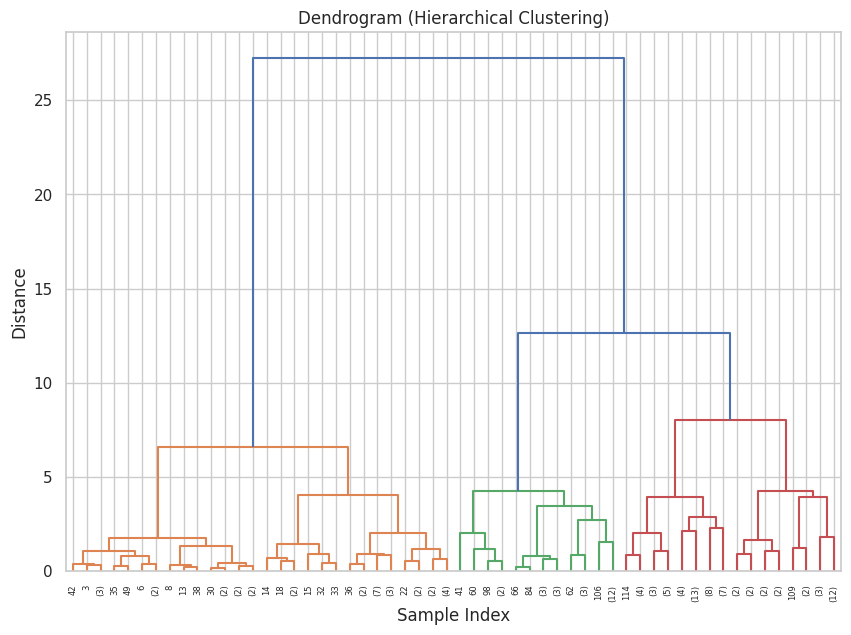

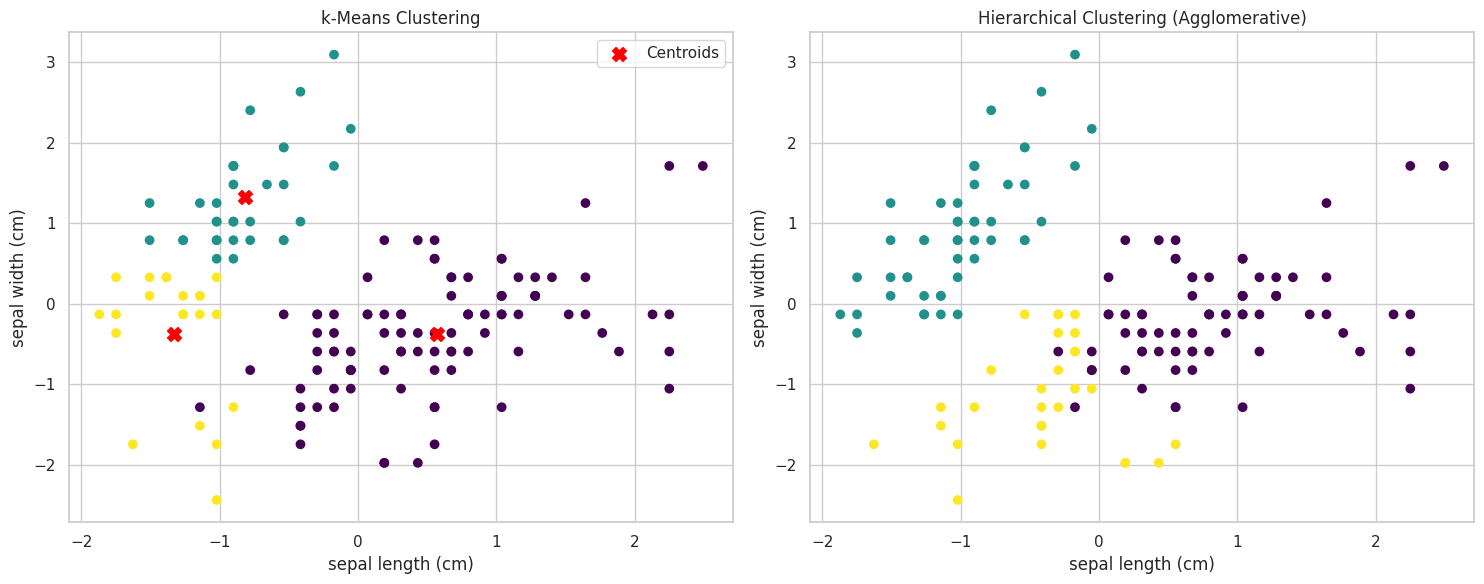

k-Means Cluster Labels:
[1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]

Hierarchical Clustering Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 0 2 0 2 0 2 2 2 2 0 0 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
sns.set(style="whitegrid")

# Step 1: Data Setup - Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Ground truth labels for comparison

# Step 2: Data Preprocessing - Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Implement k-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Step 4: Implement Hierarchical Clustering (Agglomerative)
# Perform hierarchical clustering and generate a dendrogram
linkage_matrix = linkage(X_scaled, method='ward')

# Step 5: Visualize the Dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram (Hierarchical Clustering)")
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=10)
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Fit Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

# Step 6: Visualizations - k-Means vs Hierarchical Clustering
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot for k-Means clusters
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Centroids')
axes[0].set_title("k-Means Clustering")
axes[0].set_xlabel(data.feature_names[0])
axes[0].set_ylabel(data.feature_names[1])
axes[0].legend()

# Scatter plot for Hierarchical Clustering
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglo_labels, cmap='viridis', marker='o')
axes[1].set_title("Hierarchical Clustering (Agglomerative)")
axes[1].set_xlabel(data.feature_names[0])
axes[1].set_ylabel(data.feature_names[1])

plt.tight_layout()
plt.show()

# Step 7: Compare Results
# Print cluster labels from both methods
print("k-Means Cluster Labels:")
print(kmeans_labels)

print("\nHierarchical Clustering Labels:")
print(agglo_labels)
